In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

# How to use coherence

### coherence of skills in vacancies

This is the 'conditional probability' you've all seen before.
It contains the probability of two skills occuring together in an (English) vacancy in our datalake

In [ ]:
from cw_utils.coherence import VacancyCoherence

VC = VacancyCoherence()

You'll remember the conditional probability values, e.g. what is the probability of knowing Python if you know Django

In [ ]:
VC.conditional_probability(skill='Python', given_skill='Django')

This obviously isn't symmetrical, probability of knowing Django if you know Python should be lower

In [ ]:
VC.conditional_probability(skill='Django', given_skill='Python')

Now this doesn't tell us how 'similar' these two skills are, that's where we introduce the very original name 'similarity', this is obviously symmetrical!

In [ ]:
VC.similarity(skill_a='Python', skill_b='Django')

In [ ]:
VC.similarity(skill_a='Django', skill_b='Python')

### coherence of sentences

Now we can do the same thing, but based on the co-occurence of skill in 'sentences' within vacancies, instead of in the whole vacancy.

Notes:
1) This is very related to vacancy coherence, with the difference that it isn't made as sparse as VacancyCoherence
2) The similarity values between VacancyCoherence and SentenceCoherence are NOT RELATED, meaning that you have to compare apples with apples, not apples with oranges

In [ ]:
from cw_utils.coherence import SentenceCoherence

SC = SentenceCoherence()

In [ ]:
SC.similarity(skill_a='Python', skill_b='Java')

### ok, what's the point?

Let's use this to help clean taxonomies!

There is a little helper class called 'SkillClusterCoherenceHelper', and it can use any coherence metric!

In [ ]:
from cw_utils.coherence import SkillClusterCoherenceHelper

SCH = SkillClusterCoherenceHelper(SC)
VCH = SkillClusterCoherenceHelper(VC)

We can do simple stuff like computing coherence and comparing

In [ ]:
SCH.coherence_of_skill_cluster(['Python', 'Django', 'AWS'])

In [ ]:
SCH.coherence_of_skill_cluster(['Java', 'Django', 'AWS'])

In [ ]:
SCH.coherence_of_skill_cluster(['Java', 'Django', 'AWS', 'Mulching'])

In [ ]:
SCH.coherence_of_skill_cluster(['Java', 'Django', 'AWS', 'Scipy'])

In [ ]:
SCH.most_likely_outlier_of_skill_cluster(['Java', 'Django', 'AWS', 'Pandas', 'Mulching'], top_n=5)

In [ ]:
VCH.most_likely_outlier_of_skill_cluster(['Java', 'Django', 'AWS', 'SciPy', 'Mulching'], top_n=5)

We can expand this further and do stuff like most likely_skill_clusters

In [ ]:
from loader import load_taxonomy

tax = load_taxonomy("./data/proximus/taxonomy/[cleaned] taxonomy-export.json")

In [ ]:
SCH.most_likely_skill_cluster_in_taxonomy('Microsoft Azure', tax, top_n=5)

In [ ]:
VCH.most_likely_skill_cluster_in_taxonomy('Payroll Management', tax, top_n=5)

### This was all market (datalake) based, can we do this client-specific?

Yes, I'd like to introduce 'InventoryCoherence', it's the same class signature, as the VacancyCoherence and SentenceCoherence, but for an inventory

In [ ]:
from loader import load_inventory

_, inv = load_inventory("./data/proximus/skill_inventory", "proximus", do_clean=False)

In [ ]:
from cw_utils.coherence import InventoryCoherence

IC = InventoryCoherence(inv)

In [ ]:
IC.inventory.skills['Java']

In [ ]:
IC.inventory.skills['Python']

In [ ]:
IC.get_cooccurrence_matrix(['Java', 'Python'])

In [ ]:
IC.similarity(skill_a='Python', skill_b='Java')

We can use this again to have 'the most likely skill cluster' based on employee profiles!

In [ ]:
ICH = SkillClusterCoherenceHelper(IC)

In [ ]:
ICH.most_likely_skill_cluster_in_taxonomy('Java', tax, top_n=5)

You can see that there is new information here!

In [ ]:
inventory_employee_sample = list(IC.inventory.profiles[0])[:10]

In [ ]:
inventory_employee_sample

In [ ]:
IC.plot_conditional_probability_heatmap(inventory_employee_sample, figsize=10)

In [ ]:
SC.plot_conditional_probability_heatmap(inventory_employee_sample, figsize=10)

Note that this does NOT neccesarily need to be a set of employees! This can be any list of skill profiles

In [14]:
from SkillEngine.taxonomy import Inventory
from cw_utils.coherence import skills_to_profile, InventoryCoherence


custom_inv = Inventory([
    skills_to_profile(['JavaFX', 'Django', 'Python']),
    skills_to_profile(['JavaFX', 'Django', 'Python', 'Software Development']),
    skills_to_profile(['Python', 'Django']),
    skills_to_profile(['JavaFX', 'Apache Spark']),
    skills_to_profile(['JavaFX']),
    skills_to_profile(['Java', 'Django', 'Python']),
    skills_to_profile(['Java', 'Django', 'Python', 'Software Development']),
    skills_to_profile(['Python', 'Django']),
    skills_to_profile(['Java', 'Apache Spark']),
    skills_to_profile(['Java']),
    skills_to_profile(['Python']),
    skills_to_profile(['Python']),
    skills_to_profile(['Python']),
    skills_to_profile(['Python']),
    skills_to_profile(['Python']),
    skills_to_profile(['Python']),
    skills_to_profile(['Mulching'])
])

custom_inv_IC = InventoryCoherence(custom_inv, n_components=3)
IC = custom_inv_IC

/home/appuser/skillengine/SkillEngine/skill_profile.py:117: UserWarning: ProfileSkill created with missing fields. Provided fields: name, probability. Supported fields: name, weight, proficiency_level, probability
  warnings.warn(


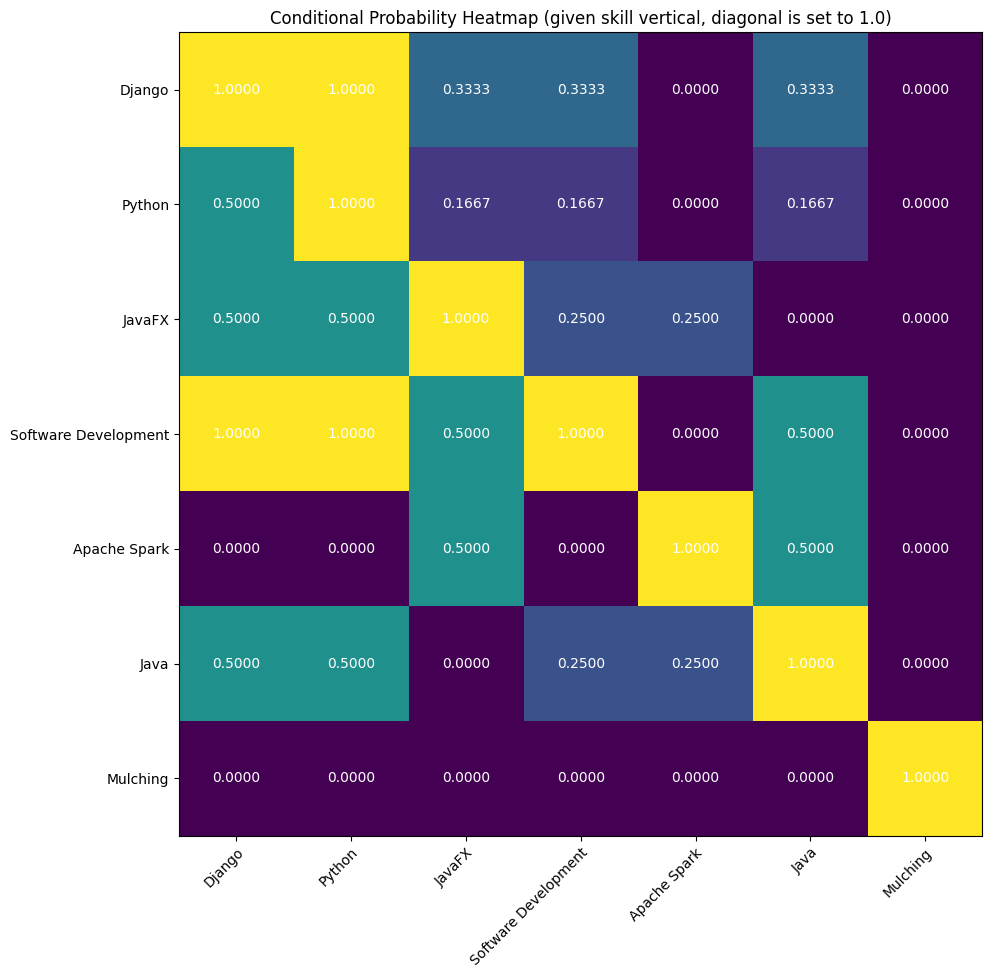

In [15]:
custom_inv_IC.plot_conditional_probability_heatmap([s for s in custom_inv.skills.keys()], figsize=10)

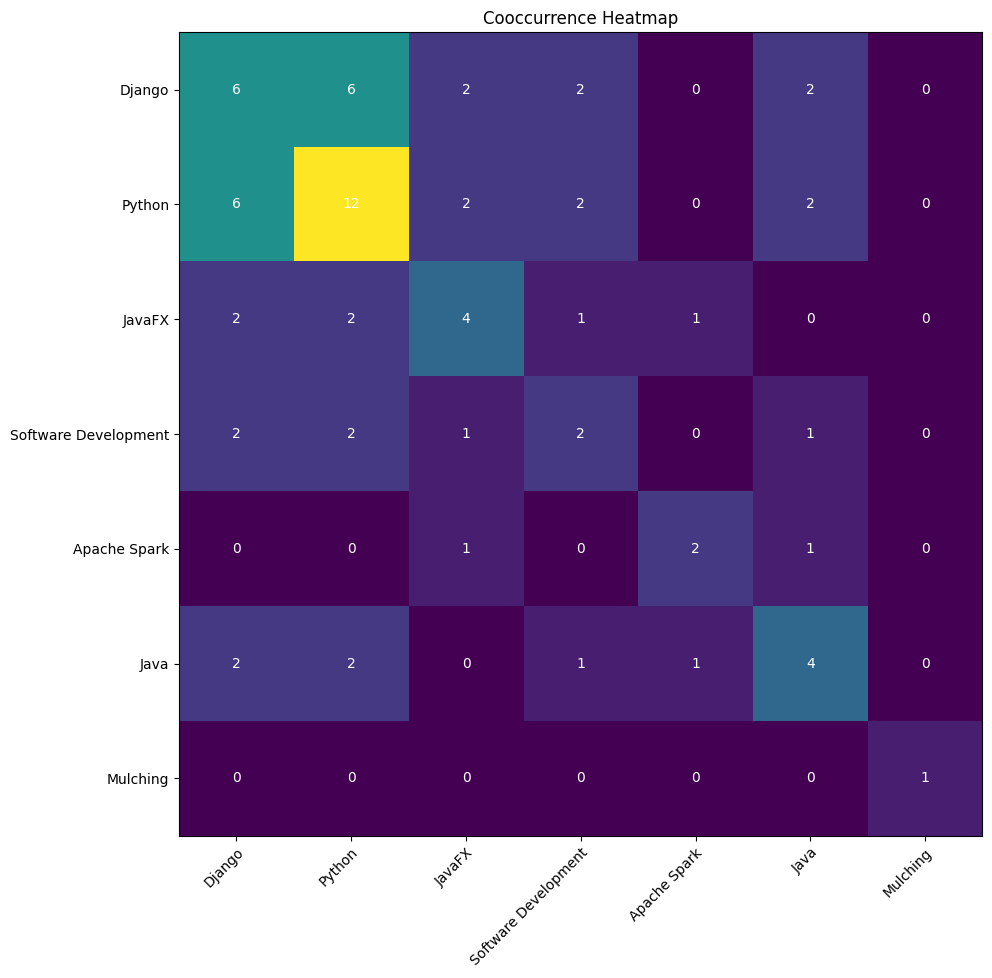

In [16]:
custom_inv_IC.plot_cooccurrence_heatmap([s for s in custom_inv.skills.keys()], figsize=10)

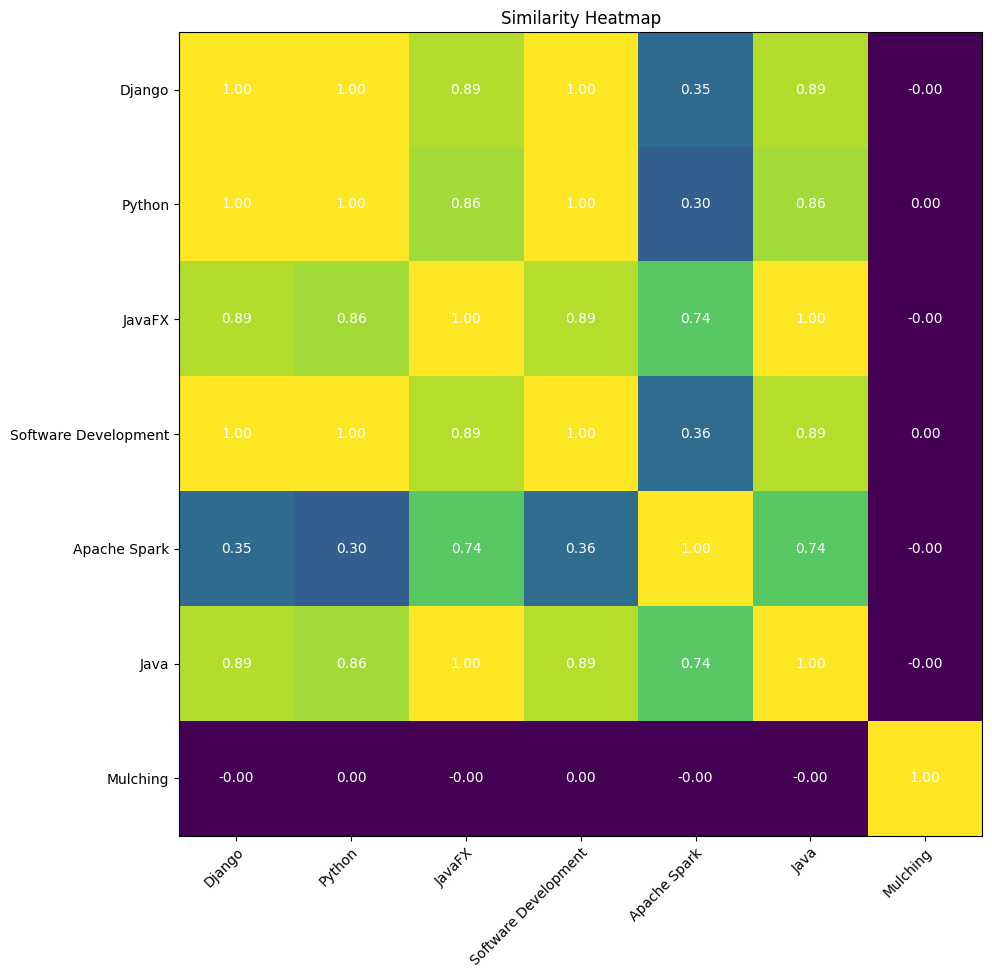

In [17]:
custom_inv_IC.plot_similarity_heatmap([s for s in custom_inv.skills.keys()], figsize=10)

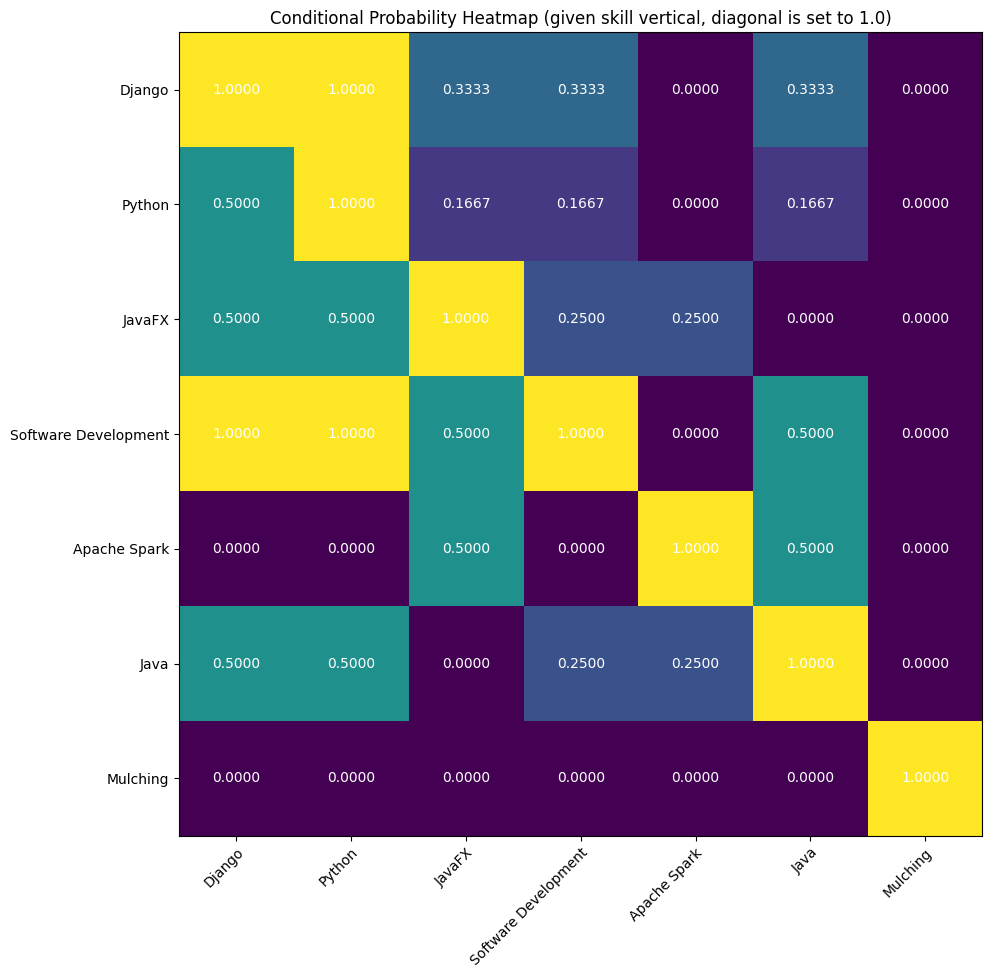

In [18]:
custom_inv_IC.plot_conditional_probability_heatmap([s for s in custom_inv.skills.keys()], figsize=10)

In [19]:
from SkillEngine import load

scp = load('skill-conditional-probabilities')
scp.get_conditional_probability_matrix(scp.skills_to_id(['Python', 'Django', 'Java']), scp.skills_to_id(['Python', 'Django', 'Java']), given_skills_probabilities=None)

array([[0.        , 0.03949494, 0.3802153 ],
       [0.9108269 , 0.        , 0.30339962],
       [0.37716675, 0.01305042, 0.        ]], dtype=float32)

In [20]:
scp.get_conditional_probability(skill='Python', given_skill='Django')

0.9108269

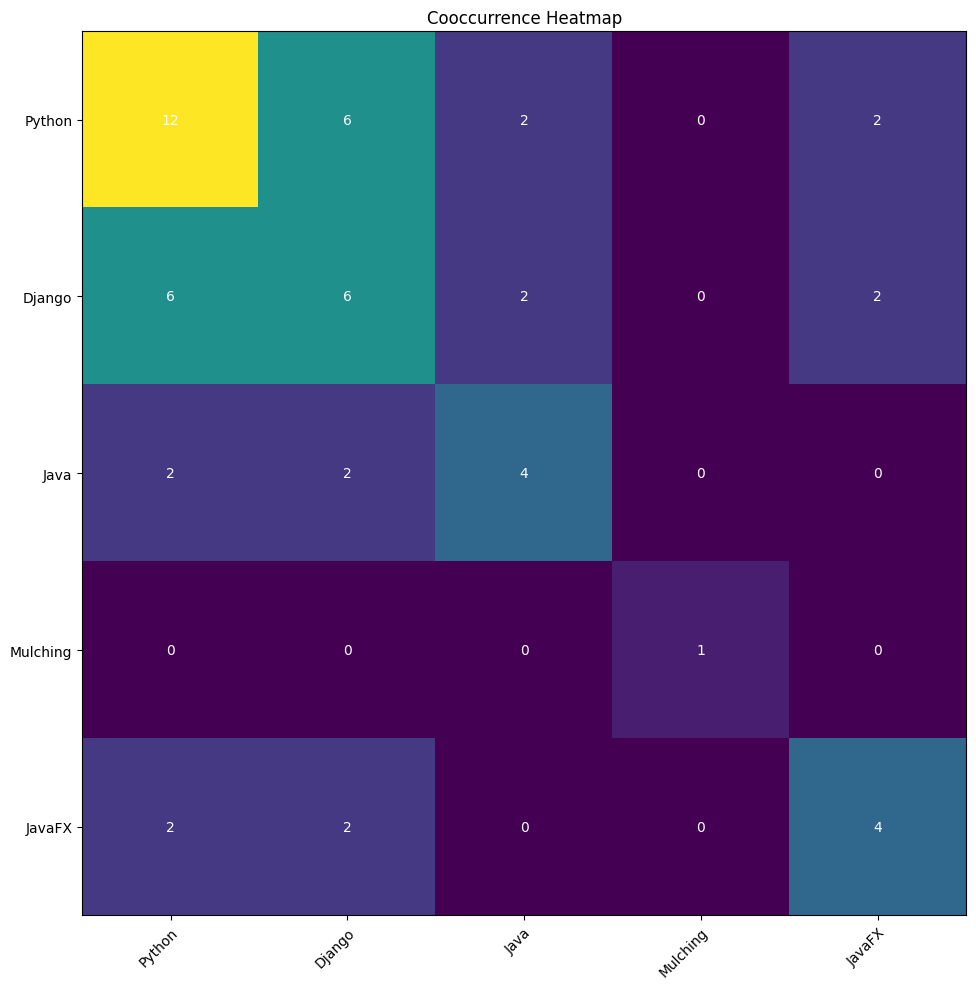

In [24]:
IC.plot_cooccurrence_heatmap(['Python', 'Django', 'Java', 'Mulching', 'JavaFX'], figsize=10)

In [22]:
cooc_matrix = IC.get_cooccurrence_matrix(['Python', 'Django', 'Java'])

In [36]:
cooc_matrix

array([[9., 3., 2.],
       [3., 3., 2.],
       [2., 2., 4.]])

In [50]:
cooc_matrix / cooc_matrix.diagonal()

array([[1.        , 1.        , 0.5       ],
       [0.33333333, 1.        , 0.5       ],
       [0.22222222, 0.66666667, 1.        ]])

In [39]:
IC.get_conditional_probability_matrix(['Python', 'Django', 'Java'])

array([[1.        , 0.33333333, 0.22222222],
       [1.        , 1.        , 0.66666667],
       [0.5       , 0.5       , 1.        ]])

In [41]:
IC.conditional_probability('Python', 'Django')

1.0

In [42]:
IC.conditional_probability('Django', 'Python')

0.3333333333333333

In [34]:
cooc_matrix / cooc_matrix.diagonal()

array([[1.        , 1.        , 0.5       ],
       [0.33333333, 1.        , 0.5       ],
       [0.22222222, 0.66666667, 1.        ]])

In [12]:
conditional_probability_matrix = IC.get_conditional_probability_matrix(['Python', 'Django', 'Java'])

In [13]:
conditional_probability_matrix

array([[1.        , 0.33333333, 0.22222222],
       [1.        , 1.        , 0.66666667],
       [0.5       , 0.5       , 1.        ]])

In [14]:
skill_probabilities = IC.get_skill_probabilities(['Python', 'Django', 'Java'])

In [15]:
skill_probabilities

array([0.2195122 , 0.07317073, 0.09756098])

In [20]:
1/0.219

4.566210045662101

In [11]:
IC.conditional_probability(skill='Python', given_skill='Django')

1.0

In [16]:
pmi_matrix = conditional_probability_matrix / skill_probabilities

In [17]:
pmi_matrix

array([[ 4.55555556,  4.55555556,  2.27777778],
       [ 4.55555556, 13.66666667,  6.83333333],
       [ 2.27777778,  6.83333333, 10.25      ]])

In [18]:
pmi_matrix = conditional_probability_matrix / skill_probabilities.reshape(1, -1).T

In [19]:
pmi_matrix

array([[ 4.55555556,  1.51851852,  1.01234568],
       [13.66666667, 13.66666667,  9.11111111],
       [ 5.125     ,  5.125     , 10.25      ]])

### Lastly we can also do it on any 'Document'!

In [ ]:
import pandas as pd
from cw_utils.coherence import DocumentCoherence

df = pd.read_csv("./proximus_job_descriptions.csv")
document_list = df['job_description'].tolist()

DC = DocumentCoherence(document_list)

In [ ]:
DC.plot_conditional_probability_heatmap(inventory_employee_sample, figsize=10)

In [ ]:
DCH = SkillClusterCoherenceHelper(DC)

In [ ]:
SCH.most_likely_skill_cluster_in_taxonomy('Python', tax, top_n=5)

In [54]:
m = IC.get_cooccurrence_matrix(['Python', 'Django', 'Java'])

In [85]:
print(m)
total_count = m.sum()
print(total_count)

[[9. 3. 2.]
 [3. 3. 2.]
 [2. 2. 4.]]
30.0


### BEFORE

In [86]:
import numpy as np

def calculate_shifted_ppmi(matrix, total_count, k=16):
    conditional_probabilities_matrix = matrix / matrix.diagonal()
    skill_probs = matrix.diagonal() / total_count

    matrix = np.maximum(
        np.log2(
            (conditional_probabilities_matrix / np.array([skill_probs]).T)) -
        np.log2(k), 0)
    return matrix

In [87]:
calculate_shifted_ppmi(m, total_count=total_count, k=1)

array([[1.73696559, 1.73696559, 0.73696559],
       [1.73696559, 3.32192809, 2.32192809],
       [0.73696559, 2.32192809, 2.9068906 ]])

### AFTER

In [88]:
import numpy as np

def calculate_shifted_ppmi(matrix, total_count, k=16):
    conditional_probabilities_matrix = matrix / matrix.diagonal().reshape(-1,1)
    skill_probs = matrix.diagonal() / total_count

    matrix = np.maximum(
        np.log2(
            (conditional_probabilities_matrix / skill_probs)) -
        np.log2(k), 0)
    return matrix

In [89]:
calculate_shifted_ppmi(m, total_count=total_count, k=1)

array([[1.73696559, 1.73696559, 0.73696559],
       [1.73696559, 3.32192809, 2.32192809],
       [0.73696559, 2.32192809, 2.9068906 ]])

In [ ]:
git 